<a href="https://colab.research.google.com/github/omkar123katare/X-2-test-of-independecne-feature-enginering-for-categorical-columns-/blob/main/Chi_Square_test_of_independence_for_categorical_feature_selection_in_classification_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **we will see how we can apply statistical thinking in feature selection process. We will apply  Chi-Square test of independence in this video.  Chi-Square test of independence is used to determine if there is a significant relationship between two categorical variables**

**Question - What different technique can you use for feature selection.**

**Answer -** Statistical techniques are not the only way to do feature selection, We can do **foreward selection**, **Backward elimination**If we have large dataset, we can **sub-sample our dataset into multiple chunks, then train XG-Boost, random-forest classifier. From each classifier, we can get feature importances**. We can also have some **probabilistic ways of selecting the top features**. There are multiple options available for feature engineering.

**Question - Why go for statistical tests to identify the sigificant features then?**

**Answer -** 
1. Above methods are computationally heavy. 
2. I did not want to move into my modelling stage with unnecessaty features.
3. I want to move ahead with my model building using only the important features.

##**Start**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
churn_master_copy=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
churn_data=churn_master_copy.copy()
churn_data.head()

In [86]:
churn_data.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


### Here target varibale is Churn. We will take independent categorical variables and see signifance of a categorical variable against the target variable column. 
1. If the variable is not significant, we can drop it and need not use it in the machine learning pipeline.
2. If it is significant, we use it in machine learning pipeline.

##**Checking if gender column is statistically significant while predicting churn**

In [15]:
# Unique values/ categories in the columns
print(f"Number of unique elements in the gender column are {churn_data['gender'].nunique()} ----> {churn_data['gender'].unique()}")
print(f"Number of unique elements in the churn column are {churn_data['Churn'].nunique()} ----> {churn_data['Churn'].unique()}")

Number of unique elements in the gender column are 2 ----> ['Female' 'Male']
Number of unique elements in the churn column are 2 ----> ['No' 'Yes']


**Null Hypothesis-** There is no relationship between 'Churn' and 'gender' columns.


**Alternate Hypothesis-** There is a relationship between 'Churn' and 'gender' columns.

Chi-sqaure test will tell us about the significance of the relationship between the two categorical columns. i.e. if the selected column is statistically significant for Churn column ( target column ) or not.

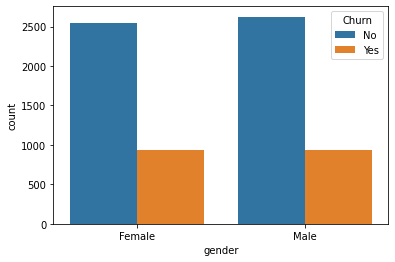

In [18]:
sns.countplot(data=churn_data,x='gender',hue='Churn')

From above graph we can say that we can just remove the gender column, Because the impact of gender on churnig seems to be negligible. We will check this using statistical test-**Chi-sqaure test**.

The way Chi-Square test works is, we need to create a **contegency table**. Contency table are also called as **crosstab**. This table is used to **summarize the relationship batween several categorical values**. 

In [52]:
gender_churn_crosstab_value=pd.crosstab(index=churn_data['Churn'],columns=churn_data['gender'])

In [53]:
gender_churn_crosstab_value

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


Internally to find the chi2 statistic, following formula is used-

**X^2= (sum(Observed - Expected)^2/Expected)**

But how exactly is it calculated?

In [54]:
gender_churn_crosstab_value.iloc[0].values

array([2549, 2625])

In [55]:
gender_churn_crosstab_value.iloc[1].values

array([939, 930])

Now to run Chi-square test, we will use **scipy stats package**. We will use **Chi-square test of independence**. There are multiple ways of using a Chi-sqaure test. Here we will use **'Pearson's Chi-sqaure test of independence'**.

In [56]:
from scipy import stats

In [65]:
# For using Chi-sqaure Contegency table, we need to pass in list of values corrsponding to different categories
(chi2_value_gender,p_value_gender,degrees_of_freedom_gender,array_gender)=stats.chi2_contingency([gender_churn_crosstab_value.iloc[0].values,gender_churn_crosstab_value.iloc[1].values])

In [66]:
print(chi2_value_gender)

0.4840828822091383


In [67]:
# number_of_categories-1
print(degrees_of_freedom_gender)

1


**How is this p-value obtained theoretically?**

We need to use the chi2 value obtained from formula to check the chi2 table and for coresponding (**chi2 value** and **degrees of freedom value**) we can get the p-value.

In [68]:
print(p_value_gender)

0.48657873605618596


P-value we obtained to 0.48. The critical value (alpha value) we had set is 0.05. The obtained **P-vlaue is way more than critical alpha value**.
**We dont need to use the gender column**, because this column is not providing any additional information on whether the customer will churn ir not.

**While doing feature selection for classification modelling** for churn data for predicting if the customer got churned, by seeing that the **P-value chi2 test between gender and churn column is way more than 0.05**, **we can just drop the gender column**. 

**1. Drop column if p-value is more than the critical alpha value**

**2. Don't drop column if p-value is lass than crtitical alpha value**

##**Checking if paperless billing column is statistically significant while predicting churn**

:**Null Hypothesis-** There is no relationship between 'Churn' and 'paperless billing' columns.


**Alternate Hypothesis-** There is a relationship between 'Churn' and 'paperless billing' columns.

Chi-sqaure test will tell us about the significance of the relationship between the two categorical columns. i.e. if the selected column is statistically significant for Churn column ( target column ) or not.

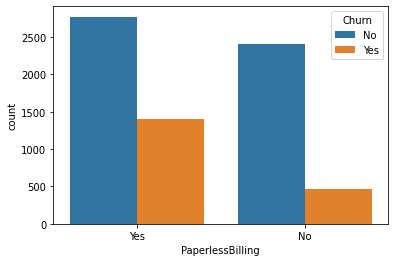

In [74]:
sns.countplot(data=churn_data,x='PaperlessBilling',hue='Churn')

In [81]:
paperless_billing_churn_crosstab_value=pd.crosstab(index=churn_data['PaperlessBilling'],columns=churn_data['Churn'])

In [82]:
paperless_billing_churn_crosstab_value

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [83]:
# For using Chi-sqaure Contegency table, we need to pass in list of values corrsponding to different categories
(chi2_value_billing,p_value_billing,degrees_of_freedom_billing,array_billing)=stats.chi2_contingency([paperless_billing_churn_crosstab_value.iloc[0].values,paperless_billing_churn_crosstab_value.iloc[1].values])

In [84]:
print(chi2_value_billing)

258.27764906707307


In [85]:
print(p_value_billing)

4.073354668665985e-58


This means, **being paperless has an impact on  whether customer has churned or not**. So, 'paperless'column has some direct or indirect impact on 'churn' **hence, Paperless billing is an important column and hence must be used while doing classification modelling for churn prediction.**

##**Checking if contract column is statistically significant while predicting churn**

**Null Hypothesis-** There is no relationship between 'Churn' and 'contract' columns.


**Alternate Hypothesis-** There is a relationship between 'Churn' and 'contract' columns.

Chi-sqaure test will tell us about the significance of the relationship between the two categorical columns. i.e. if the selected column is statistically significant for Churn column ( target column ) or not.

In [88]:
contract_column_churn_crosstab_value=pd.crosstab(columns=churn_data['Contract'],index=churn_data['Churn'])

In [93]:
# For using Chi-sqaure Contegency table, we need to pass in list of values corrsponding to different categories
(chi2_value_contract,p_value_contract,degrees_of_freedom_contarct,array_billing)=stats.chi2_contingency([contract_column_churn_crosstab_value.iloc[0].values,contract_column_churn_crosstab_value.iloc[1].values,contract_column_churn_crosstab_value.iloc[2].values])

In [94]:
print(chi2_value_contract)

1184.5965720837926


In [95]:
print(p_value_contract)

5.863038300673391e-258


**P value is way less than 0.05**. Hence **contract column is very significant while while predicting 'Churn'**

#**Chi2 test VS cramers V test**


1. **chi2 test** tells about **significance of the relationship**.
2. **cramers V** test tells us about the **strength of the relationship**.

#**Chi2 test VS Fishers Exact test**

1. **Fishers Exact test** is mostly used where there are **less observations in categories**. ( Not useful for US). Also number of categories are less (may be 2)

Eg. Having less than 5 observations in category buckets. Having only 2 categories. i.e. Contingency table is a 2*2 matrix.